<a href="https://colab.research.google.com/github/yepinshuo/Image_Colorization/blob/main/Initial_Test_for_Image_Colorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dropout, MaxPooling2D, Conv2D, Dense
from keras.datasets import cifar10
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage.color import rgb2grey
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
X = np.vstack((X_train,X_test))
y = np.vstack((y_train,y_test))

In [ ]:
y = y.flatten()

In [ ]:
X.shape, y.shape

((60000, 32, 32, 3), (60000,))

In [ ]:
ind = [i for i,j in enumerate(y) if j == 2]

In [ ]:
X = X[ind]
y = y[ind]

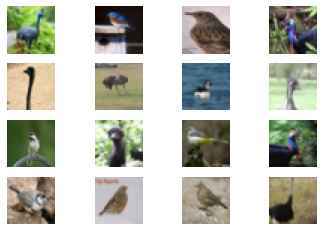

In [ ]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show()

In [ ]:
X.shape, y.shape

((6000, 32, 32, 3), (6000,))

In [ ]:
X = X.reshape((6144000,3))
X.shape

(6144000, 3)

In [ ]:
kmeans = KMeans(n_clusters=8,random_state=0)
kmeans = kmeans.fit(X)

In [ ]:
kmeans.cluster_centers_

array([[109.04646893, 108.65873286,  82.65256734],
       [206.45982535, 211.6690945 , 211.23916718],
       [156.08021478, 155.43644948, 135.52865413],
       [ 49.10876556,  50.09701508,  38.64433048]])

In [ ]:
X_new = X

In [ ]:
X.shape

(6144000, 3)

In [ ]:
for i in range(len(X)):
    X_new[i] = kmeans.cluster_centers_[kmeans.labels_[i]]

[[156 155 135]
 [109 108  82]
 [109 108  82]
 ...
 [156 155 135]
 [156 155 135]
 [156 155 135]]


In [ ]:
X_viz = X_new.reshape((6000,32,32,3))
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X_viz[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show()

[[156 155 135]
 [109 108  82]
 [109 108  82]
 ...
 [156 155 135]
 [156 155 135]
 [156 155 135]]


In [ ]:
from keras import utils as np_utils
y_N = keras.utils.np_utils.to_categorical(kmeans.labels_).reshape((6000,32,32,4))

In [ ]:
X = X.reshape((6000,32,32,3))
X_N = []
for i in range(len(X)):
    X_N.append(rgb2gray(X[i]).tolist())
X_N = np.array(X_N)

NameError: ignored

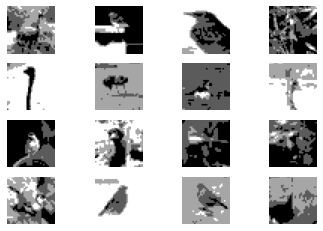

In [ ]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X_N[i]
    axis.imshow(arr,cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
X_N = X_N.reshape((6000,32,32,1))
X_N.shape, y_N.shape

((6000, 32, 32, 1), (6000, 32, 32, 4))

In [ ]:
X_train = X_N[0:5984]
y_train = y_N[0:5984]
X_test = X_N[-16:]
y_test = y_N[-16:]
X_train = np.vstack((X_train,X_test))
y_train = np.vstack((y_train,y_test))
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6000, 32, 32, 1), (6000, 32, 32, 4), (16, 32, 32, 1), (16, 32, 32, 4))

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(64, kernel_size = (5,5), strides=(1, 1), padding='same', input_shape = (32,32,1)))
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
cnn.add(Conv2D(64, kernel_size = (5,5), strides=(1, 1), padding='same'))
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
cnn.add(Dense(32, activation='softmax'))
cnn.add(Dense(4, activation='softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        102464    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dense (Dense)               (None, 32, 32, 32)        2080      
                                                                 
 dense_1 (Dense)             (None, 32, 32, 4)         1

Epoch 1/30
169/169 [==============================] - 107s 628ms/step - loss: 1.3763 - accuracy: 0.3002 - val_loss: 1.3659 - val_accuracy: 0.3312
Epoch 2/30
169/169 [==============================] - 107s 635ms/step - loss: 1.3566 - accuracy: 0.3381 - val_loss: 1.3552 - val_accuracy: 0.3312
Epoch 3/30
169/169 [==============================] - 108s 639ms/step - loss: 1.3478 - accuracy: 0.3381 - val_loss: 1.3504 - val_accuracy: 0.3312
Epoch 4/30
169/169 [==============================] - 106s 628ms/step - loss: 1.3434 - accuracy: 0.3381 - val_loss: 1.3478 - val_accuracy: 0.3312
Epoch 5/30
169/169 [==============================] - 106s 626ms/step - loss: 1.3405 - accuracy: 0.3381 - val_loss: 1.3458 - val_accuracy: 0.3312
Epoch 6/30
169/169 [==============================] - 109s 643ms/step - loss: 1.3379 - accuracy: 0.3381 - val_loss: 1.3432 - val_accuracy: 0.3312
Epoch 7/30
169/169 [==============================] - 107s 631ms/step - loss: 1.3338 - accuracy: 0.3382 - val_loss: 1.3376 -

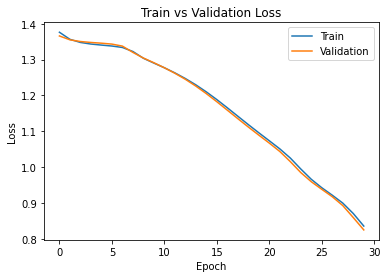

In [ ]:
cnn.compile(loss='categorical_crossentropy', optimizer='sgd', metrics = ['accuracy'])
history = cnn.fit(X_train, y_train, epochs=30, validation_split=0.1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
predictions = cnn.predict(X_test)
predictions.shape

(16, 32, 32, 4)

In [ ]:
predictions = predictions.reshape((16384,4))
pred = predictions[:,0:3]
for i in range(len(predictions)):
    pred[i] = kmeans.cluster_centers_[np.argmax(predictions[i])].tolist()
pred = pred.reshape((16,32,32,3))

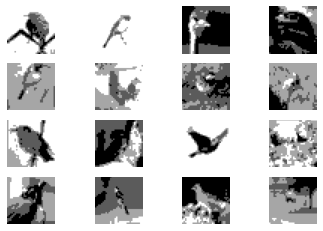

In [ ]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X_test.reshape(16,32,32)[i]
    axis.imshow(arr, cmap='gray')
    plt.axis('off')
plt.show()

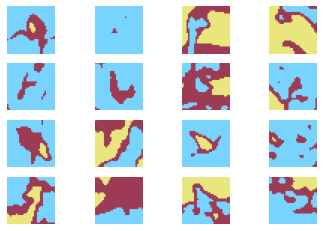

In [ ]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = pred[i]
    axis.imshow((arr * 255).astype(np.uint8))
    plt.axis('off')
plt.show()